<img src="../../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Seaborn-Regression</H1></u></center>

In [1]:
import seaborn as sns
%matplotlib inline
import pandas as pd

## <u>Linear Regression:</u>

In [2]:
# Load the example tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### lmplot and regplot functions:

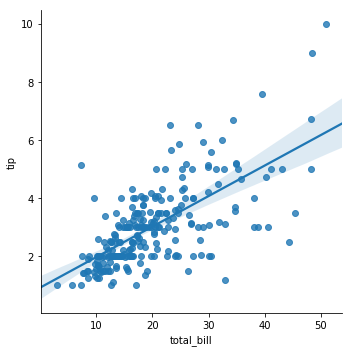

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips)

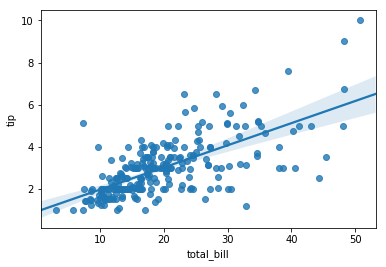

In [4]:
sns.regplot(x=tips["total_bill"], y=tips["tip"], data=tips)

#### The main difference to know about is that regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. 

## Multiple Linear Regression:

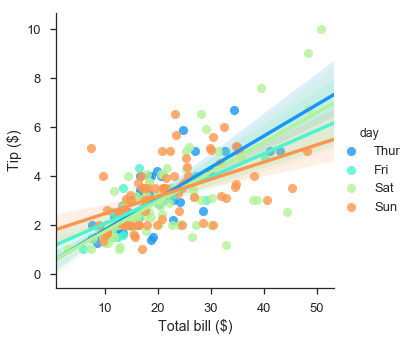

In [5]:
sns.set(style="ticks", context="talk")

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="total_bill", y="tip", hue="day", data=tips,
               palette="rainbow", size=5)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Total bill ($)", "Tip ($)")

## Polynomial Regression:

In [6]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


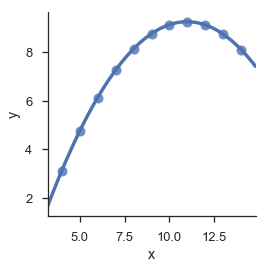

In [7]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 100},size=4)

### Residplot: 
Can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

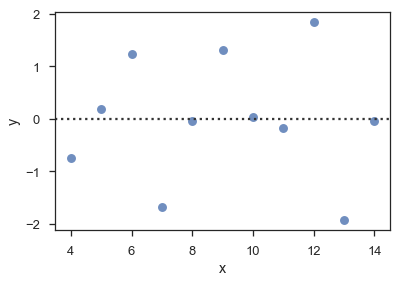

In [8]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

## Difference regplot() and lmplot() on categorical data

While regplot() always shows a single relationsihp, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables

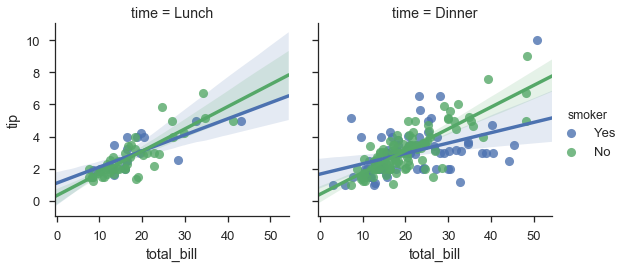

In [9]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips,size=4)

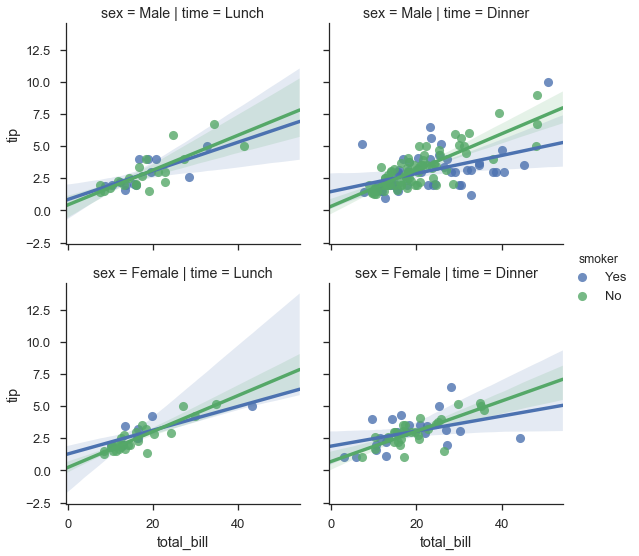

In [10]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips, size=4)

## <u>Logistic Regression:</u>

#### On Logistic Regression the outpout is a discrete value that could be only 0 or 1.

In [11]:
# Load the example titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### On this case we can set the survived variable at 0 for not survived and 1 for survived, the same for sex: male = 0 and female = 1.

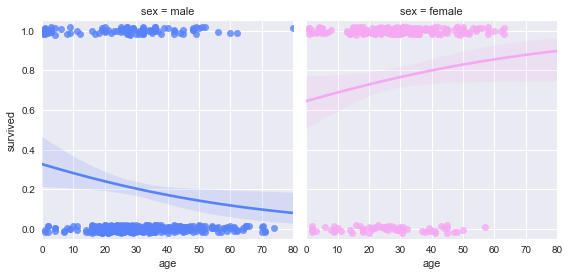

In [12]:
sns.set(style="darkgrid")
# Make a custom palette with gendered colors
pal = dict(male="#5882FA", female="#F5A9F2")
# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, size=4)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

#### You can set the palette color on <b>HTML color chart<b>. For reference you can visit: http://html-color-codes.info/

## Controlling the size and shape of the plot:

#### Plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. This is because func:regplot is an “axes-level” function draws onto a specific axes. This means that you can make mutli-panel figures yourself and control exactly where the the regression plot goes. If no axes is provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself. Lets see some examples:

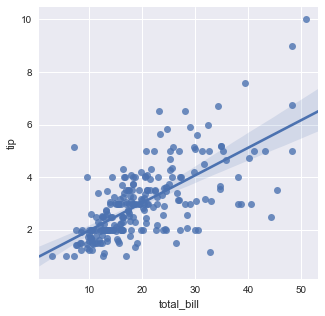

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

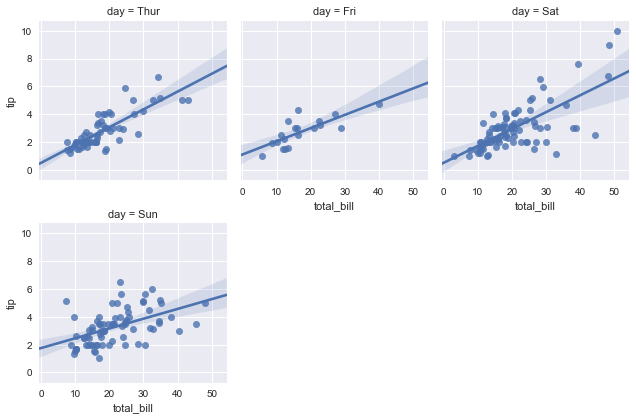

In [14]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=3, size=3)

## JointPlot:
jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg"

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


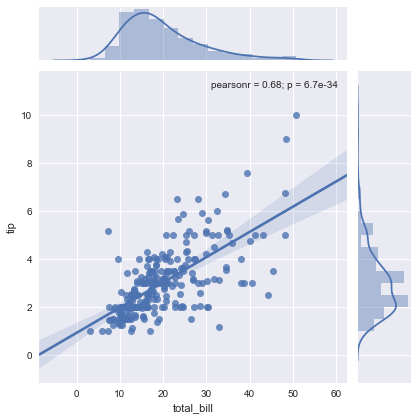

In [15]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

## PairPlot:
Using the pairplot() function with kind="reg" combines regplot() and PairGrid to show the linear relationship between variables in a dataset. Note how this is different from lmplot(). In the figure below, the two axes don’t show the same relationship conditioned on two levels of a third variable; rather, PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset

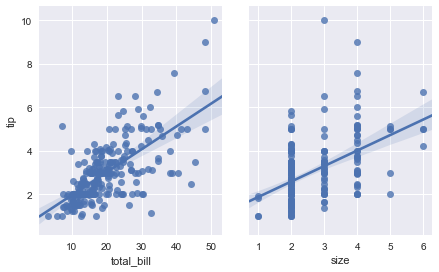

In [16]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=4, aspect=.8, kind="reg")

### Adding a categorical variable

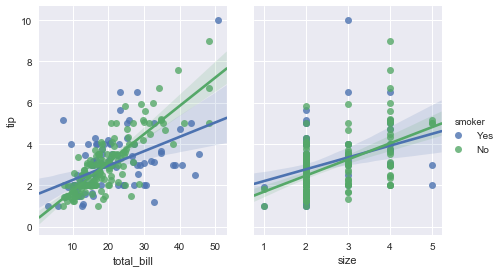

In [17]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=4, aspect=.8, kind="reg")

## Reference:

http://seaborn.pydata.org/generated/seaborn.regplot.html

https://seaborn.pydata.org/tutorial/regression.html